# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "APPID=" + api_key + "&q="

In [5]:
# create list for each 
cities_2 =[]
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# set initial number for record and set
recordNum = 0
setNum = 1

In [6]:
# Build query URL
# print log of each city as it's being processed
print("Beginning Data Retrieval")
print("------------------------") 

# Loop through the list of cities and perform a request for data on each
for citi in cities:
    weather_response = requests.get(query_url + citi.replace(" ", "%20")).json() 
    print("Processing Record "+str(recordNum)+" for Set " + str(setNum) + " | "+citi)
    print(query_url + citi.replace(" ", "%20"))
    if weather_response['cod'] == 200:
        cities_2.append(citi)
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])
        Date.append(weather_response['dt'])
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])
        Lng.append(weather_response['coord']['lon'])
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
    else:
        print("City not found. Skipping...")

# increase record number as we go through the list, if record number hits 50, then record number reset to 0 and set number add 1.
    recordNum +=1
    if recordNum == 50:
        recordNum = 0
        setNum +=1

Beginning Data Retrieval
------------------------
Processing Record 0 for Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=vaini
Processing Record 1 for Set 1 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=ponta%20do%20sol
Processing Record 2 for Set 1 | fort saint john
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=fort%20saint%20john
City not found. Skipping...
Processing Record 3 for Set 1 | pousat
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=pousat
City not found. Skipping...
Processing Record 4 for Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=barrow
Processing Record 5 for Set 1 | denia
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=denia
Processing Record 6 for Set 1 | puerto ayora
http://api.

Processing Record 8 for Set 2 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=puerto%20escondido
Processing Record 9 for Set 2 | ulladulla
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=ulladulla
Processing Record 10 for Set 2 | adrar
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=adrar
Processing Record 11 for Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=thompson
Processing Record 12 for Set 2 | saleaula
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=saleaula
City not found. Skipping...
Processing Record 13 for Set 2 | luderitz
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=luderitz
Processing Record 14 for Set 2 | nara
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=

Processing Record 15 for Set 3 | pevek
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=pevek
Processing Record 16 for Set 3 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=kyzyl-suu
Processing Record 17 for Set 3 | namibe
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=namibe
Processing Record 18 for Set 3 | lucapa
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=lucapa
Processing Record 19 for Set 3 | belushya guba
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=belushya%20guba
City not found. Skipping...
Processing Record 20 for Set 3 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=bolungarvik
City not found. Skipping...
Processing Record 21 for Set 3 | ilam
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa75

Processing Record 23 for Set 4 | gushikawa
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=gushikawa
Processing Record 24 for Set 4 | fortuna
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=fortuna
Processing Record 25 for Set 4 | pinega
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=pinega
Processing Record 26 for Set 4 | olinda
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=olinda
Processing Record 27 for Set 4 | pisco
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=pisco
Processing Record 28 for Set 4 | saint george
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=saint%20george
Processing Record 29 for Set 4 | brazzaville
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=brazzaville
Processing Record 30 for 

Processing Record 31 for Set 5 | husavik
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=husavik
Processing Record 32 for Set 5 | ozgon
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=ozgon
City not found. Skipping...
Processing Record 33 for Set 5 | san policarpo
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=san%20policarpo
Processing Record 34 for Set 5 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=bredasdorp
Processing Record 35 for Set 5 | launceston
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=launceston
Processing Record 36 for Set 5 | huarmey
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=huarmey
Processing Record 37 for Set 5 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3

Processing Record 39 for Set 6 | iqaluit
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=iqaluit
Processing Record 40 for Set 6 | roma
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=roma
Processing Record 41 for Set 6 | khorixas
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=khorixas
Processing Record 42 for Set 6 | sorong
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=sorong
Processing Record 43 for Set 6 | sao filipe
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=sao%20filipe
Processing Record 44 for Set 6 | kautokeino
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=kautokeino
Processing Record 45 for Set 6 | vaitape
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=vaitape
Processing Record 46 for Set 6 | 

Processing Record 49 for Set 7 | lincoln
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=lincoln
Processing Record 0 for Set 8 | klaksvik
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=klaksvik
Processing Record 1 for Set 8 | necochea
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=necochea
Processing Record 2 for Set 8 | songjianghe
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=songjianghe
Processing Record 3 for Set 8 | north bend
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=north%20bend
Processing Record 4 for Set 8 | haines junction
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=haines%20junction
Processing Record 5 for Set 8 | tuatapere
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=tuatapere
Proce

Processing Record 6 for Set 9 | san quintin
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=san%20quintin
Processing Record 7 for Set 9 | ishigaki
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=ishigaki
Processing Record 8 for Set 9 | kungurtug
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=kungurtug
Processing Record 9 for Set 9 | michalovce
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=michalovce
Processing Record 10 for Set 9 | lujan
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=lujan
Processing Record 11 for Set 9 | inuvik
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=inuvik
Processing Record 12 for Set 9 | pomoryany
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=pomoryany
Processing Record 13 for 

Processing Record 14 for Set 10 | ishinomaki
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=ishinomaki
Processing Record 15 for Set 10 | liverpool
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=liverpool
Processing Record 16 for Set 10 | thessalon
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=thessalon
Processing Record 17 for Set 10 | kang
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=kang
Processing Record 18 for Set 10 | mogadishu
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=mogadishu
Processing Record 19 for Set 10 | hede
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=hede
Processing Record 20 for Set 10 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=saint-pierre
Processing Record 

Processing Record 23 for Set 11 | lubao
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=lubao
Processing Record 24 for Set 11 | huaicheng
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=huaicheng
Processing Record 25 for Set 11 | aras
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=aras
Processing Record 26 for Set 11 | shetpe
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=shetpe
Processing Record 27 for Set 11 | north port
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=north%20port
Processing Record 28 for Set 11 | port hardy
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=port%20hardy
Processing Record 29 for Set 11 | bantry
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=bantry
City not found. Skipping...


Processing Record 31 for Set 12 | jiexiu
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=jiexiu
Processing Record 32 for Set 12 | dudinka
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=dudinka
Processing Record 33 for Set 12 | meylan
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=meylan
Processing Record 34 for Set 12 | utiroa
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=utiroa
City not found. Skipping...
Processing Record 35 for Set 12 | suntar
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=suntar
Processing Record 36 for Set 12 | te anau
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=te%20anau
Processing Record 37 for Set 12 | bartica
http://api.openweathermap.org/data/2.5/weather?APPID=ac0b84f50fa7579422bbab30d5a3955f&q=bartica
Processing R

In [7]:
weather_dict = {
    "City" : cities_2,
    "Cloudiness" : Cloudiness,
    "Country" : Country,
    "Date" : Date,
    "Humidity" : Humidity,
    "Lat" : Lat,
    "Lng" : Lng,
    "Max Temp" : Max_Temp,
    "Wind Speed" : Wind_Speed  
}

In [8]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,0,IN,1559447536,74,15.34,74.49,299.150,3.10
1,ponta do sol,0,BR,1559447536,93,-20.63,-46.00,289.715,0.58
2,barrow,59,AR,1559447537,51,-38.31,-60.23,283.915,3.89
3,denia,0,ES,1559447537,58,38.84,0.11,290.930,1.78
4,puerto ayora,34,EC,1559447431,95,-0.74,-90.35,296.480,3.59


In [9]:
weather_data.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64

In [12]:
import os
print(os.getcwd())

# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

/Users/jingwang/Desktop/PREWORK-JW/Week6/starter_code


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

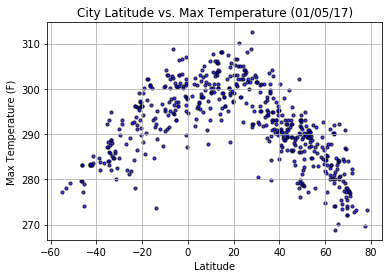

In [13]:
Latitude = weather_data['Lat']
Temperature = weather_data['Max Temp']

x_axis = Latitude
y_axis = Temperature

# Build the scatter plots for each city types
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75, linewidth=1)

# Add labels to the x and y axes
plt.title("City Latitude vs. Max Temperature (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

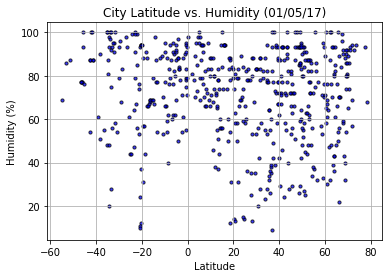

In [14]:
Latitude = weather_data['Lat']
Humidity = weather_data['Humidity']

x_axis = Latitude
y_axis = Humidity

# Build the scatter plots for each city types
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75, linewidth=1)

# Add labels to the x and y axes
plt.title("City Latitude vs. Humidity (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

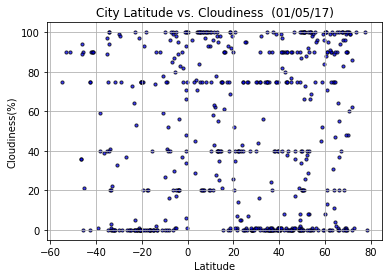

In [15]:
Latitude = weather_data['Lat']
Cloudiness  = weather_data['Cloudiness']

x_axis = Latitude
y_axis = Cloudiness 

# Build the scatter plots for each city types
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75, linewidth=1)

# Add labels to the x and y axes
plt.title("City Latitude vs. Cloudiness  (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

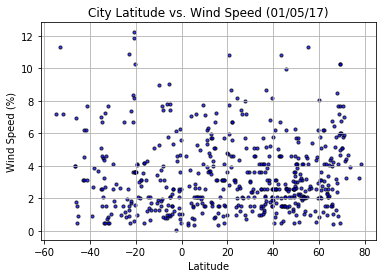

In [16]:
Latitude = weather_data['Lat']
Wind_Speed  = weather_data['Wind Speed']

x_axis = Latitude
y_axis = Wind_Speed

# Build the scatter plots for each city types
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=10, alpha=0.75, linewidth=1)

# Add labels to the x and y axes
plt.title("City Latitude vs. Wind Speed (01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Set a grid on the plot
plt.grid()

# Save the plot and display it
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()